In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pennylane as qml
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# Load the dataset
data = pd.read_csv('../diabetesPIMA.csv')
feature_columns = data.columns[:-1]  # All columns except 'Outcome'

In [11]:
# Initialize variables
accuracy_results = []  # Initialize to store feature sets and their accuracies
column_importance = {col: 0 for col in feature_columns}

In [12]:
def evaluate_model(selected_columns):
    X = data[selected_columns].values
    y = data['Outcome'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    n_qubits = len(selected_columns)
    dev = qml.device('default.qubit', wires=n_qubits)
    params = np.random.normal(0, np.pi, size=n_qubits * 3)

    @qml.qnode(dev)
    def quantum_circuit(params, x):
        for i in range(n_qubits):
            qml.RX(x[i], wires=i)
            qml.RZ(params[i], wires=i)
        
        for i in range(n_qubits):
            for j in range(i + 1, n_qubits):
                target = (j + 1) % n_qubits
                if target != i and target != j:
                    qml.Toffoli(wires=[i, j, target])
        
        for i in range(n_qubits):
            qml.RX(params[n_qubits + i], wires=i)
            qml.RZ(params[2 * n_qubits + i], wires=i)
        
        return qml.expval(qml.PauliZ(0))

    y_pred = np.array([quantum_circuit(params, X_test[i]) for i in range(len(X_test))])
    y_pred = (y_pred > 0).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [13]:
# Feature selection and evaluation
max_columns = len(feature_columns)
iterations = 5
sample = 1

In [14]:
for num_columns in range(1, max_columns + 1):
    for _ in range(iterations):
        if sample < 41:
            selected_columns = np.random.choice(feature_columns, size=num_columns, replace=False)
            accuracy = evaluate_model(selected_columns)
            
            if accuracy > 0.5 and len(selected_columns) > 2:
                print(f"Sample {sample}")
                print(f"\tNumber of columns: {len(selected_columns)}")
                print(f"\tAccuracy: {accuracy:.2%}")
                accuracy_results.append((selected_columns, accuracy))
                sample += 1
                for col in selected_columns:
                    column_importance[col] += accuracy

Sample 1
	Number of columns: 3
	Accuracy: 68.83%
Sample 2
	Number of columns: 4
	Accuracy: 58.44%
Sample 3
	Number of columns: 5
	Accuracy: 66.88%
Sample 4
	Number of columns: 6
	Accuracy: 59.09%
Sample 5
	Number of columns: 6
	Accuracy: 63.64%
Sample 6
	Number of columns: 7
	Accuracy: 66.88%
Sample 7
	Number of columns: 7
	Accuracy: 55.84%
Sample 8
	Number of columns: 7
	Accuracy: 59.09%
Sample 9
	Number of columns: 7
	Accuracy: 68.83%
Sample 10
	Number of columns: 7
	Accuracy: 64.29%
Sample 11
	Number of columns: 8
	Accuracy: 55.19%
Sample 12
	Number of columns: 8
	Accuracy: 51.95%


In [15]:
# Convert results to DataFrame
accuracy_results = pd.DataFrame(accuracy_results, columns=["Features", "Accuracy"])
sorted_results = accuracy_results.sort_values(by="Accuracy", ascending=False)
sorted_results["No. Features"] = sorted_results["Features"].apply(len)
sorted_results["Features"] = sorted_results["Features"].apply(lambda x: ', '.join(x))[:10]

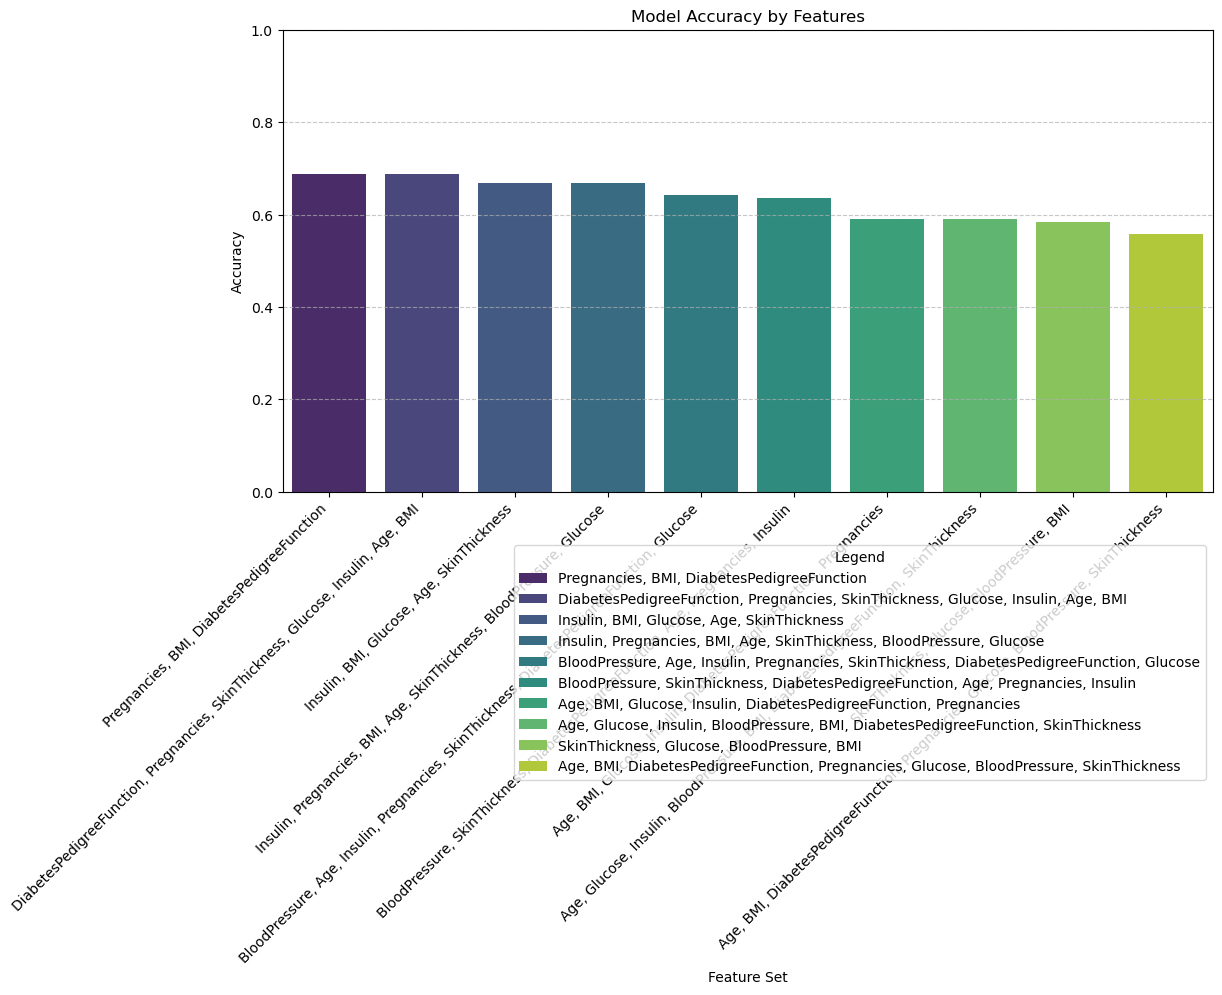

In [16]:
# Plotting Accuracy by Feature Set
plt.figure(figsize=(12, 6))
sns.barplot(x="Features", y="Accuracy", data=sorted_results, palette="viridis", hue="Features")
plt.ylabel('Accuracy')
plt.xlabel('Feature Set')
plt.title('Model Accuracy by Features')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Legend', loc='upper right', bbox_to_anchor=(1, -0.1))
plt.show()

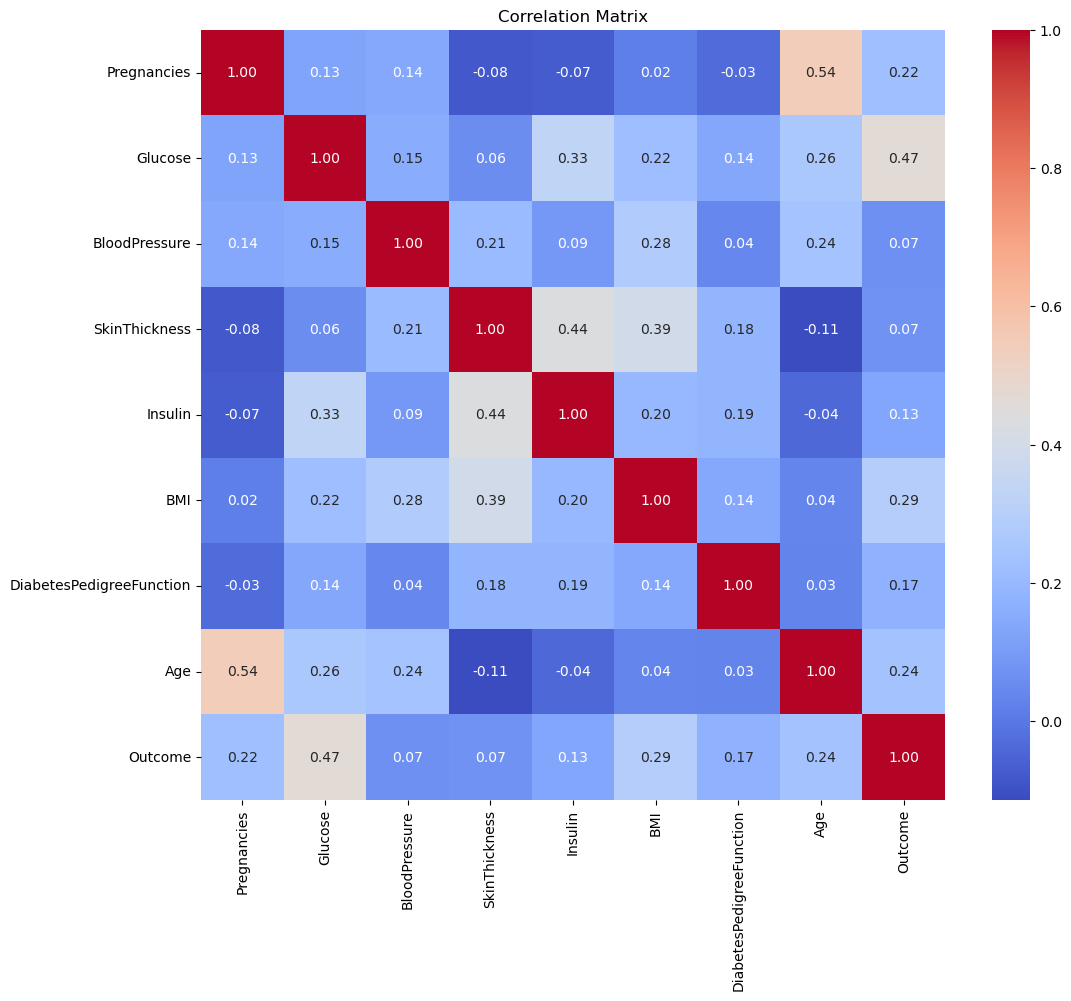

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Using Randomizer SHA

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pennylane as qml
import seaborn as sns
import matplotlib.pyplot as plt
import os
import hashlib

In [22]:
# Load the dataset
data = pd.read_csv('../diabetesPIMA.csv')
feature_columns = data.columns[:-1]  # All columns except 'Outcome'

# Initialize variables
accuracy_results = []  # Initialize to store feature sets and their accuracies
column_importance = {col: 0 for col in feature_columns}

In [18]:

def cryptographic_randomizer(choices, num_select):
    """
    A cryptographic randomizer for selecting elements from a list.
    
    Args:
        choices (list): The list of elements to choose from.
        num_select (int): The number of elements to select.
        
    Returns:
        list: A list of selected elements.
    """
    if num_select > len(choices):
        raise ValueError("num_select cannot be greater than the number of choices available.")
    
    chosen_indices = set()
    while len(chosen_indices) < num_select:
        random_bytes = os.urandom(16)
        hash_value = int(hashlib.sha256(random_bytes).hexdigest(), 16)
        index = hash_value % len(choices)
        chosen_indices.add(index)
    
    selected = [choices[i] for i in chosen_indices]
    return selected

In [23]:
def evaluate_model(selected_columns):
    X = data[selected_columns].values
    y = data['Outcome'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    n_qubits = len(selected_columns)
    dev = qml.device('default.qubit', wires=n_qubits)
    params = np.random.normal(0, np.pi, size=n_qubits * 3)

    @qml.qnode(dev)
    def quantum_circuit(params, x):
        for i in range(n_qubits):
            qml.RX(x[i], wires=i)
            qml.RZ(params[i], wires=i)
        
        for i in range(n_qubits):
            for j in range(i + 1, n_qubits):
                target = (j + 1) % n_qubits
                if target != i and target != j:
                    qml.Toffoli(wires=[i, j, target])
        
        for i in range(n_qubits):
            qml.RX(params[n_qubits + i], wires=i)
            qml.RZ(params[2 * n_qubits + i], wires=i)
        
        return qml.expval(qml.PauliZ(0))

    y_pred = np.array([quantum_circuit(params, X_test[i]) for i in range(len(X_test))])
    y_pred = (y_pred > 0).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Feature selection and evaluation
max_columns = len(feature_columns)
iterations = 5
sample = 1

for num_columns in range(1, max_columns + 1):
    for _ in range(iterations):
        if sample < 41:
            selected_columns = cryptographic_randomizer(feature_columns, num_columns)
            accuracy = evaluate_model(selected_columns)
            
            if accuracy > 0.5 and len(selected_columns) > 2:
                print(f"Sample {sample}")
                print(f"\tNumber of columns: {len(selected_columns)}")
                print(f"\tAccuracy: {accuracy:.2%}")
                accuracy_results.append((selected_columns, accuracy))
                sample += 1
                for col in selected_columns:
                    column_importance[col] += accuracy

Sample 1
	Number of columns: 3
	Accuracy: 68.18%
Sample 2
	Number of columns: 3
	Accuracy: 58.44%
Sample 3
	Number of columns: 4
	Accuracy: 66.88%
Sample 4
	Number of columns: 4
	Accuracy: 64.94%
Sample 5
	Number of columns: 4
	Accuracy: 61.04%
Sample 6
	Number of columns: 5
	Accuracy: 64.29%
Sample 7
	Number of columns: 6
	Accuracy: 64.29%
Sample 8
	Number of columns: 7
	Accuracy: 66.88%
Sample 9
	Number of columns: 7
	Accuracy: 66.23%
Sample 10
	Number of columns: 7
	Accuracy: 68.18%
Sample 11
	Number of columns: 8
	Accuracy: 67.53%
Sample 12
	Number of columns: 8
	Accuracy: 66.88%


In [24]:
# Convert results to DataFrame
accuracy_results = pd.DataFrame(accuracy_results, columns=["Features", "Accuracy"])
sorted_results = accuracy_results.sort_values(by="Accuracy", ascending=False)
sorted_results["No. Features"] = sorted_results["Features"].apply(len)
sorted_results["Features"] = sorted_results["Features"].apply(lambda x: ', '.join(x))[:10]

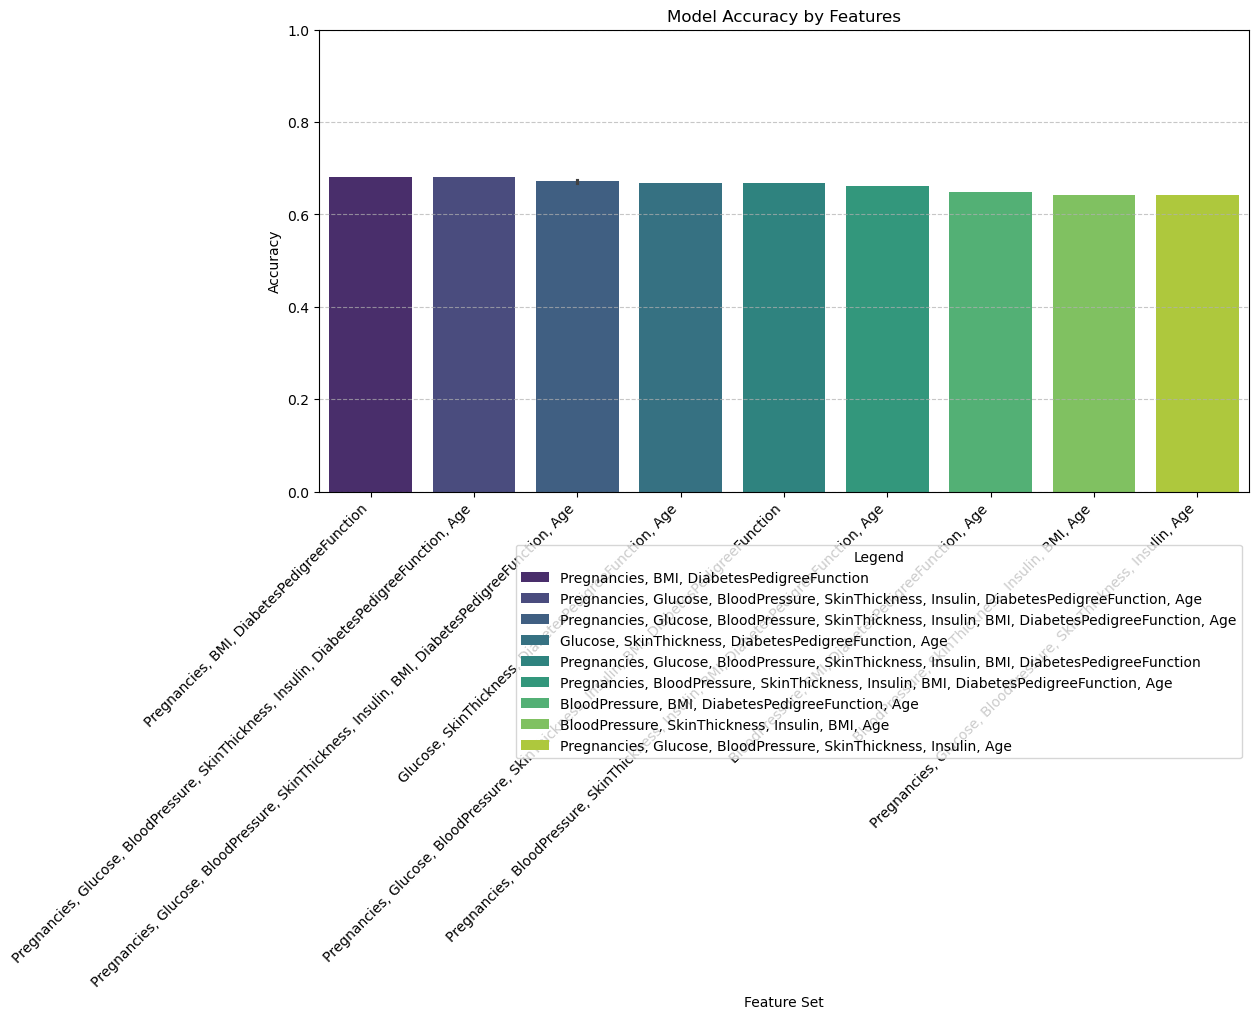

In [25]:
# Plotting Accuracy by Feature Set
plt.figure(figsize=(12, 6))
sns.barplot(x="Features", y="Accuracy", data=sorted_results, palette="viridis", hue="Features")
plt.ylabel('Accuracy')
plt.xlabel('Feature Set')
plt.title('Model Accuracy by Features')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Legend', loc='upper right', bbox_to_anchor=(1, -0.1))
plt.show()

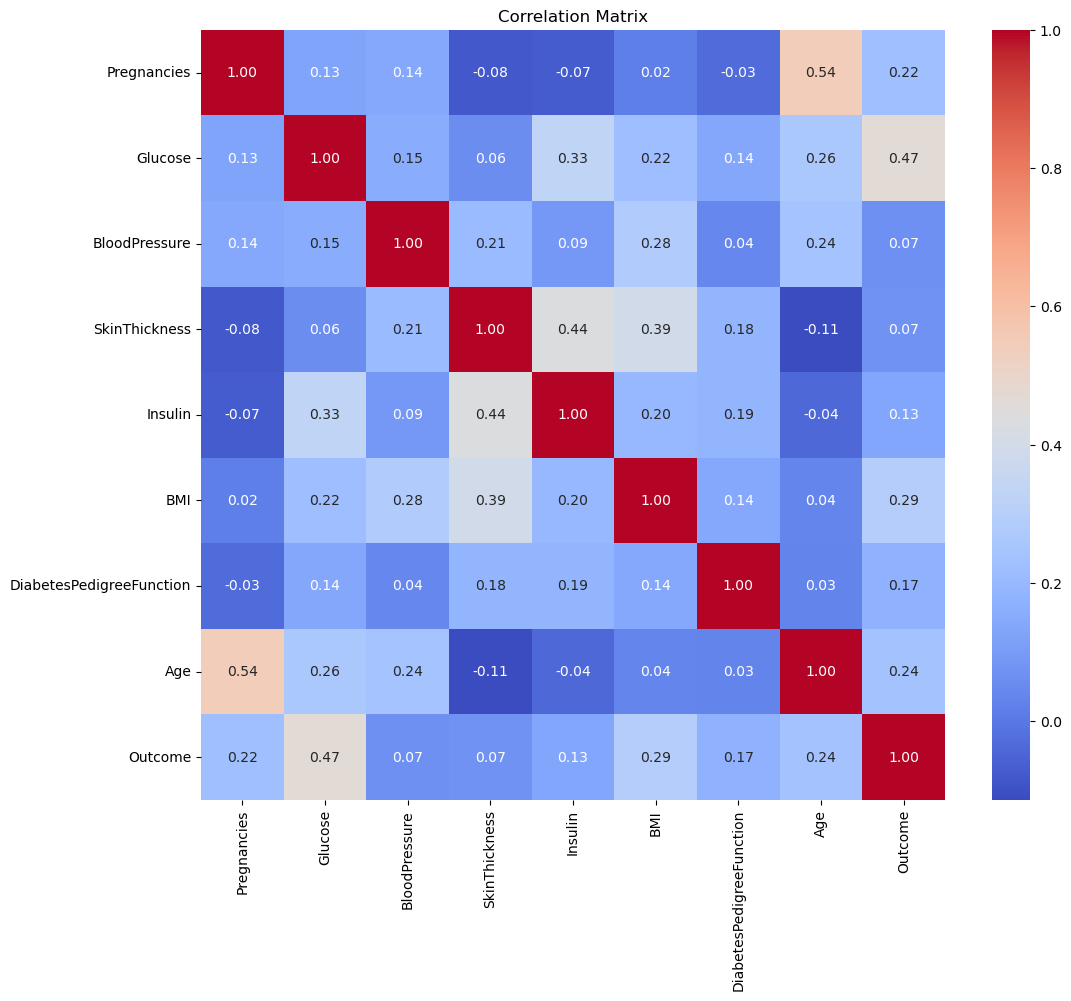

In [26]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
